In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('voice_feature_20241022.csv')


# by doing this filtering, we exclude the demographic features
voice_features = data.select_dtypes(include = [float, int])
voice_features = voice_features.dropna()

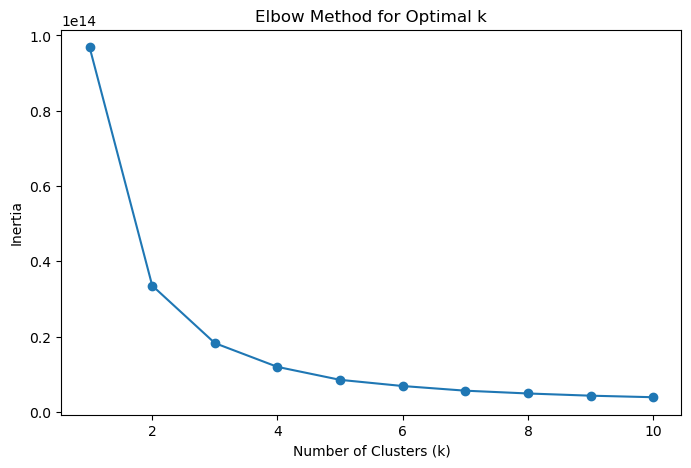

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)  # Testing clusters from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(voice_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


By the elbow method, the ideal k is 2.

Now, we focus on one subset of this dataset. We choose rows with sampling_rate is equal to 48000.

In [4]:
data2 = data
data2 = data2[data2['sampling_rate'] == 48000]
voice_features2 = data2.select_dtypes(include = [float, int])
voice_features2 = voice_features2.dropna()


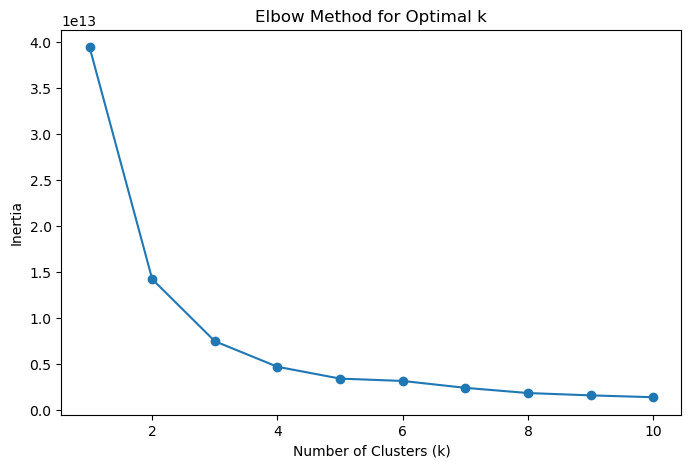

In [5]:
inertia = []
k_values = range(1, 11)  # Testing clusters from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(voice_features2)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Even the curve look sightly different, it is still basically the same as the previous one and has the same ideal k = 2.

For the last subset, I am going to see all the rows with 'seventies' in the age column.

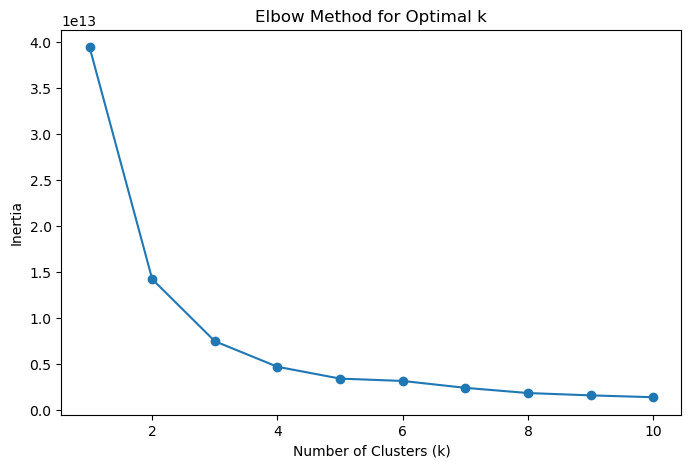

In [6]:
data3 = data
data3 = data3[data3['age'] == 'seventies']
voice_features3 = data2.select_dtypes(include = [float, int])
voice_features3 = voice_features2.dropna()

inertia = []
k_values = range(1, 11)  # Testing clusters from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(voice_features3)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

As a result, this subset also has a similar curve with its ideal k = 2.

To try another clustering method, I asked ChatGpt for another clustering method called DCBSCAN. Let's try this one:

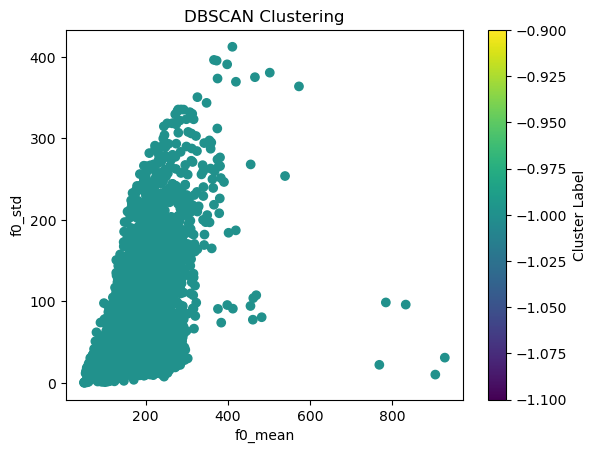

In [9]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

data4 = data
voice_features4 = data4.select_dtypes(include=[float, int]).dropna()

# Set DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Fit DBSCAN model
labels = dbscan.fit_predict(voice_features)

# Visualize results if data is 2D
plt.scatter(voice_features.iloc[:, 0], voice_features.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('f0_mean')
plt.ylabel('f0_std')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


This clustering method only uses the first two columns of the dataset. So in our voice feature data, most clustering points are marked -1, which are considered noise(outliers).